# Pre-processing Data

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score

## Read and Preprocess Data

In [3]:
data = pd.read_csv("/content/revenue_data.csv")
data.head()

,id,revenue_juta,date
0,1,112,1949-01-01
1,2,118,1949-02-01
2,3,132,1949-03-01
3,4,129,1949-04-01
4,5,121,1949-05-01


In [8]:
# Convert the 'date' column to numerical representation (e.g., days since a reference date)
data['date'] = pd.to_datetime(data['date'])
data['days_since_start'] = (data['date'] - data['date'].min()).dt.days

data.head()

,id,revenue_juta,date,days_since_start
0,1,112,1949-01-01,0
1,2,118,1949-02-01,31
2,3,132,1949-03-01,59
3,4,129,1949-04-01,90
4,5,121,1949-05-01,120


In [4]:
data.describe()

,id,revenue_juta
count,144.000000,144.000000
mean,72.500000,280.298611
std,41.713307,119.966317
min,1.000000,104.000000
25%,36.750000,180.000000
50%,72.500000,265.500000
75%,108.250000,360.500000
max,144.000000,622.000000


<ipython-input-10-6d1496a0bc7b>:9: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=10) # reduce number of x-ticks, reduce to 10


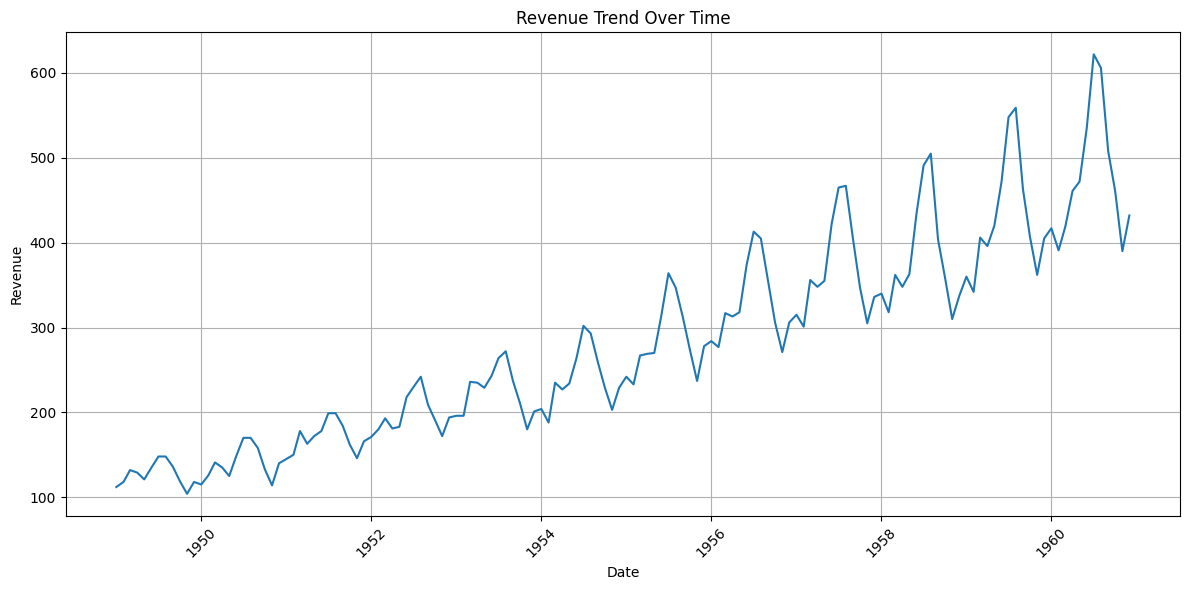

In [10]:
# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['revenue_juta'])
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Trend Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.locator_params(axis='x', nbins=10) # reduce number of x-ticks, reduce to 10
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Split the Data

In [12]:
# Define features (X) and target (y)
X = data[['days_since_start']]
y = data['revenue_juta']

# Split the data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

## Training

In [13]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Get the coefficients
beta0 = model.intercept_
beta1 = model.coef_[0]

# Print the formula
print(f"revenue = {beta0:.4f} + {beta1:.4f}*date")

revenue = 86.9213 + 0.0897*date


## Prediction and Visualization

In [15]:
# Make predictions using the test set
y_pred = model.predict(X_test)

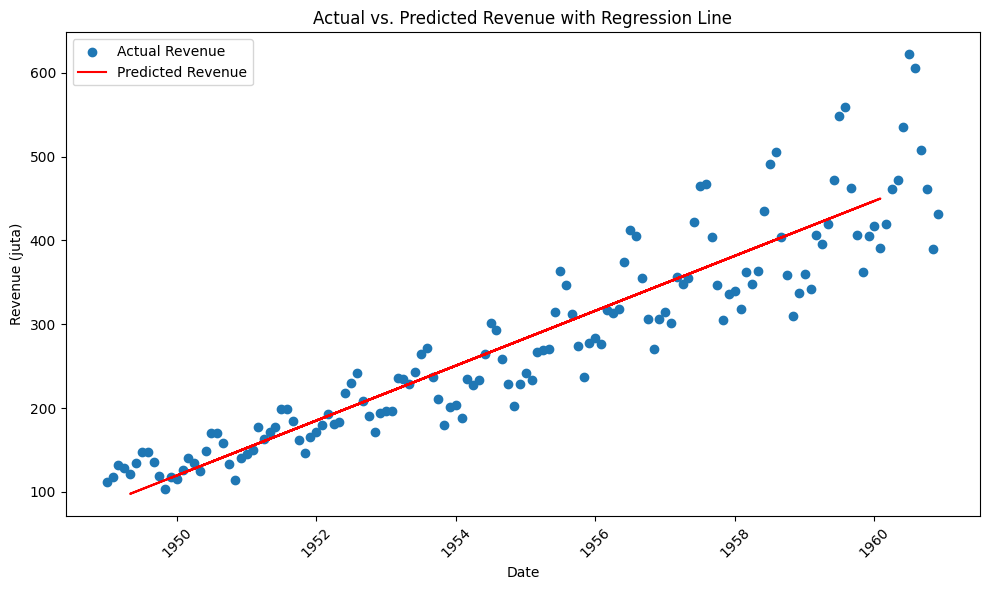

In [16]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(data['date'], data['revenue_juta'], label='Actual Revenue')
plt.plot(data['date'][X_test.index], y_pred, color='red', label='Predicted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (juta)')
plt.title('Actual vs. Predicted Revenue with Regression Line')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Evaluation

In [17]:
# Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Percentage Error: {mape*100}%")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Percentage Error: 12.166968238328032%
Root Mean Squared Error: 39.62765739142591
R-squared: 0.8419739162527862


In [18]:
# Example: Predict revenue for a future date
# Convert the future date to days since the start date
future_date = pd.to_datetime('2024-01-15')  # Example future date
future_days = (future_date - data['date'].min()).days
future_revenue = model.predict(np.array([[future_days]]))

print(f"Predicted revenue for {future_date}: {future_revenue[0]} juta")

Predicted revenue for 2024-01-15 00:00:00: 2544.6655027113547 juta


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
